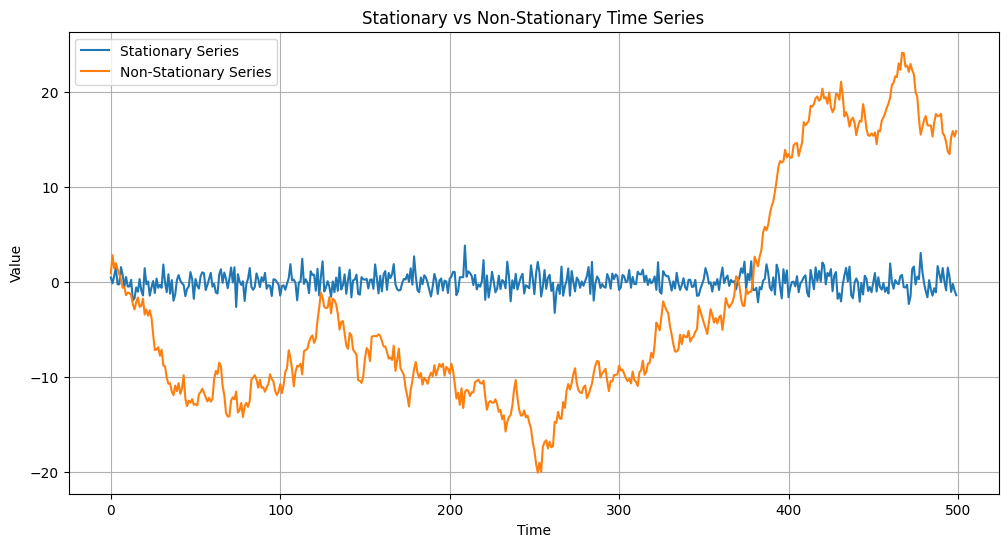

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# 构造平稳时间序列（白噪声过程
np.random.seed(42)
stationary_series = np.random.normal(loc=0, scale=1, size=500)
# 构造非平稳时间序列（随机游走过程
non_stationary_series = np.cumsum(np.random.normal(loc=0, scale=1, size=500))
# 创建数据框用于后续分析
data = pd.DataFrame({
 "Stationary": stationary_series,
 "Non-Stationary": non_stationary_series
})
plt.figure(figsize=(12, 6))
plt.plot(data['Stationary'], label='Stationary Series')
plt.plot(data['Non-Stationary'], label='Non-Stationary Series')
plt.title('Stationary vs Non-Stationary Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.savefig('stationary_vs_non_stationary.png')
plt.show()

In [6]:
def kpss_test(series):
    statistic, p_value, _, critical_values = kpss(series, regression='c')
    print("KPSS Test:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"{key}: {value:.4f}")
    print(f"Conclusion: {'Stationary' if p_value > 0.05 else 'Non-Stationary'}\n")

def adf_test(series):
    statistic, p_value, _, _, critical_values, _ = adfuller(series)
    print("Dickey-Fuller Test:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"{key}: {value:.4f}")
    print(f"Conclusion: {'Stationary' if p_value < 0.05 else 'Non-Stationary'}\n")

print("Testing the Stationary Series:\n")
kpss_test(data['Stationary'])
adf_test(data['Stationary'])

print("Testing the Non-Stationary Series:\n")
kpss_test(data['Non-Stationary'])
adf_test(data['Non-Stationary'])

Testing the Stationary Series:

KPSS Test:
Statistic: 0.1020
P-Value: 0.1000
Critical Values:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Conclusion: Stationary

Dickey-Fuller Test:
Statistic: -22.3438
P-Value: 0.0000
Critical Values:
1%: -3.4435
5%: -2.8673
10%: -2.5699
Conclusion: Stationary

Testing the Non-Stationary Series:

KPSS Test:
Statistic: 2.3271
P-Value: 0.0100
Critical Values:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Conclusion: Non-Stationary

Dickey-Fuller Test:
Statistic: -0.2820
P-Value: 0.9280
Critical Values:
1%: -3.4435
5%: -2.8673
10%: -2.5699
Conclusion: Non-Stationary



/var/folders/s1/1jpfx0m52rj4k7cgqkh7g3q40000gn/T/ipykernel_74931/892618580.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series, regression='c')
/var/folders/s1/1jpfx0m52rj4k7cgqkh7g3q40000gn/T/ipykernel_74931/892618580.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series, regression='c')
